[Real Estate Valuation](https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set)

In [3]:
# pip install openpyxl

Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd

data = pd.read_excel("../data/real_estate_valuation.xlsx")
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB
None


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [5]:
# rename the columns
renamed_columns = [col.split()[0] for col in data.columns]
renamed_columns_map = {data.columns[i]:renamed_columns[i] for i in range(len(data.columns))}

data.rename(renamed_columns_map, axis=1, inplace=True)

# remove No column
data.drop("No", axis=1, inplace=True)

print(data.head())

# separate features and target data
features, target = data.columns[:-1], data.columns[-1]

X = data[features]
y = data[target]


            X1    X2         X3  X4        X5         X6     Y
0  2012.916667  32.0   84.87882  10  24.98298  121.54024  37.9
1  2012.916667  19.5  306.59470   9  24.98034  121.53951  42.2
2  2013.583333  13.3  561.98450   5  24.98746  121.54391  47.3
3  2013.500000  13.3  561.98450   5  24.98746  121.54391  54.8
4  2012.833333   5.0  390.56840   5  24.97937  121.54245  43.1


# Model that suffers from overfitting 

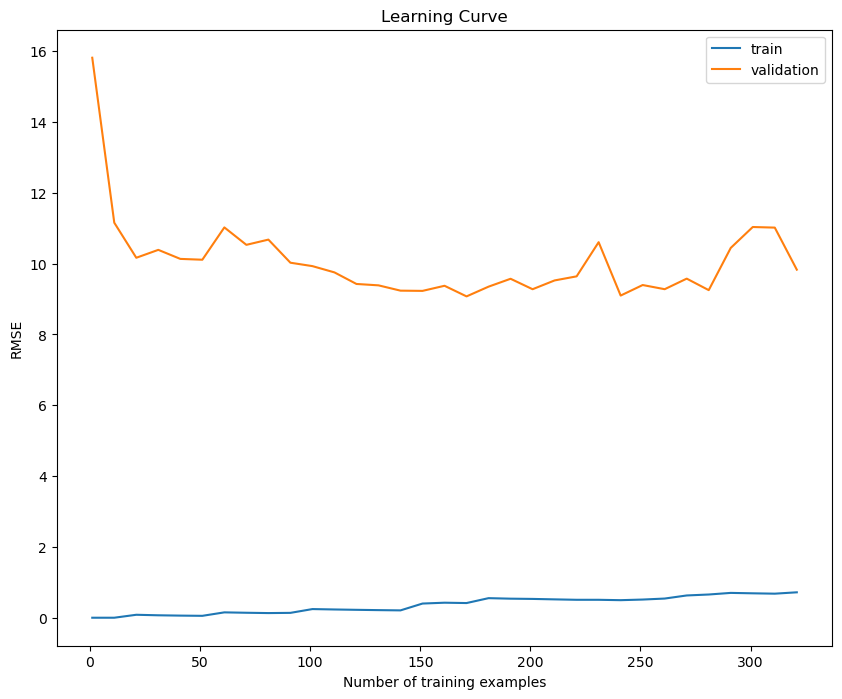

In [16]:
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# overfitting
decision_tree = DecisionTreeRegressor()

train_sizes, train_scores, test_scores = learning_curve(
    estimator=decision_tree,
    X=X,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = range(1, 330, 10)
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Number of training examples")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()

# Model that suffers from underfitting

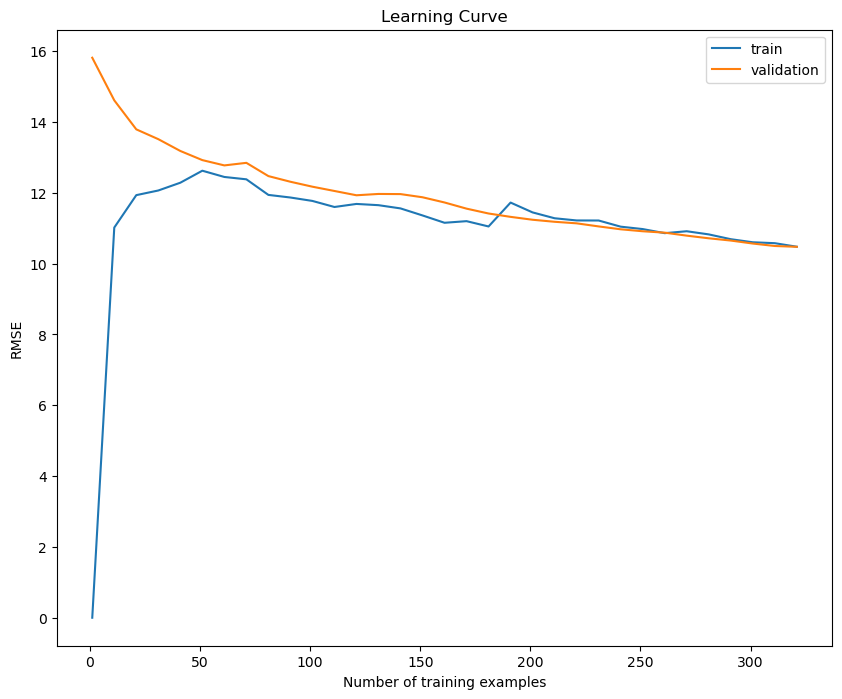

In [17]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Underfitting
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm = SVR(C=0.25)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=svm,
    X=X_scaled,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = range(1, 330, 10)
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Number of training examples")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()


# Model with the right fit

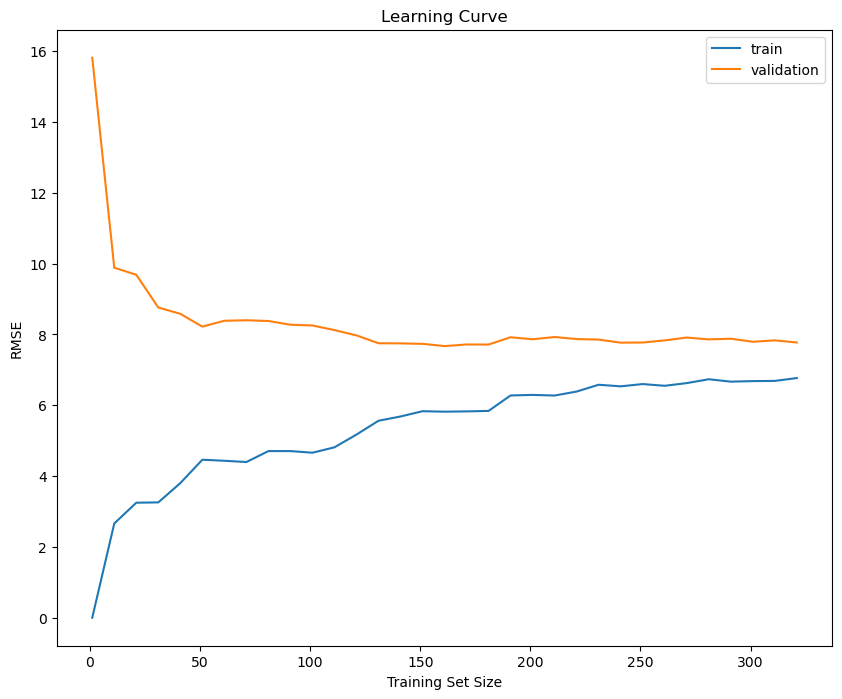

In [13]:
from sklearn.ensemble import RandomForestRegressor

# better
random_forest = RandomForestRegressor(max_depth=3)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=random_forest,
    X=X,
    y=y,
    cv=5,
    scoring="neg_root_mean_squared_error",
    train_sizes = range(1, 330, 10)
)

train_mean = -train_scores.mean(axis=1)
test_mean = -test_scores.mean(axis=1)

plt.subplots(figsize=(10,8))
plt.plot(train_sizes, train_mean, label="train")
plt.plot(train_sizes, test_mean, label="validation")

plt.title("Learning Curve")
plt.xlabel("Number of training examples")
plt.ylabel("RMSE")
plt.legend(loc="best")

plt.show()


# Unrepresentative Validation Dataset

# References

1. [Learning Curves Tutorial: What Are Learning Curves?](https://www.datacamp.com/tutorial/tutorial-learning-curves)
2. [Using Learning Curves to Analyse Machine Learning Model Performance](https://skyengine.ai/se/skyengine-blog/131-using-learning-curves-to-analyse-machine-learning-model-performance)
3. [The Shape of Learning Curves: a Review](https://arxiv.org/pdf/2103.10948.pdf)
4. [Cornell CS 5787: Applied Machine Learning. Lecture 22. Part 1: Learning Curves](https://www.youtube.com/watch?v=lYAV5KNk_TY&pp=ygUbbGVhcm5pbmcgY3VydmVzIGRpYWdub3N0aWNz)
4. [154 - Understanding the training and validation loss curves](https://youtu.be/p3CcfIjycBA)
5. [A Critical Skill People Learn Too LATE: Learning Curves In Machine Learning](https://youtu.be/nt5DwCuYY5c)